In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("DS1_C8_Computers_Data_Project.csv")
df.head()

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1


In [20]:
# Enhance Product Strategy & Sales Performance 

# TASK - 1.1 Calculate the probability

n_total = len(df)
criteria = (df['ram'] >= 8) & (df['screen'] == 14) & (df['speed'] > 33)
n_filtered = len(df[criteria])
first_probability = n_filtered / n_total 

print(f'Probability: {first_probability:.2f} or {first_probability*100:.2f}%')

Probability: 0.16 or 16.02%


### Interpretation
The code calculates the **joint probability** P(A ∩ B ∩ C) — the chance that a laptop has **RAM ≥ 8GB**, **screen = 14"**, and **speed > 33**.  
The result (**16.02%**) means about 16 out of every 100 laptops meet all three criteria.

### Business Insight
A **16.02% probability** shows that high-spec 14" laptops form a **moderate share** of the dataset.  
If demand for such specs is high, the company could **increase production** or **market it as a premium segment**.


In [21]:
# TASK - 1.2 Selling Premium Computers

criteria = (df['premium'] == "yes") & (df['cd'] == "yes")
n_filtered = len(df[criteria])
second_probability = n_filtered / n_total 

print(f'Probability: {second_probability:.2f} or {second_probability*100:.2f}%')

Probability: 0.45 or 45.12%


### Interpretation
Calculates the **conditional probability** that a **premium computer includes a CD drive**.  
The result (**45.12%**) shows that less than half of premium systems come with a CD drive.

### Business Insight
A **45.12% probability** suggests that CD drives are **no longer a key premium feature**, indicating a shift toward **modern storage solutions** like SSDs, USBs, or cloud storage.


In [28]:
# TASK - 1.3.a Selling Premium Computers with 15 inch

criteria = (df['premium'] == "yes") & (df['screen'] >= 15)
n_filtered = len(df[criteria])
Third_probability = n_filtered / n_total 

print(f'Probability (Premium): {Third_probability:.2f} or {Third_probability*100:.2f}%')

# TASK - 1.3.b Selling normal Computers with 14 inch

criteria = (df['premium'] == "no") & (df['screen'] <= 14)
n_filtered = len(df[criteria])
fourth_probability = n_filtered / n_total 

print(f'Probability (Normal): {fourth_probability:.2f} or {fourth_probability*100:.2f}%')

Probability (Premium): 0.38 or 38.49%
Probability (Normal): 0.07 or 6.76%


### Interpretation
**1.3(a):** Calculates the percentage of **premium computers** with **large screens (≥15")** → **38.49%**.  
**1.3(b):** Calculates the percentage of **normal computers** with **small screens (≤14")** → **6.76%**.  
This compares screen-size preferences across premium and normal systems.

### Business Insight
With **38.49% of premium systems** being large-screened, screen size appears to be a **key premium feature**.  
If not a majority, companies could **promote compact premium models** to attract customers who prefer portability.


In [25]:
# TASK 1.4.a Cd and Multi Media

criteria = (df['cd'] == "yes") & (df['multi'] == "yes")
n_filtered = len(df[criteria])
fifth_probability = n_filtered / n_total 

print(f'Probability (cd & multi): {fifth_probability:.2f} or {fifth_probability*100:.2f}%')

# TASk - 1.4.b computer with CD player also has multimedia kit
cd_computers = df[df['cd'] == 'yes']
n_cd = len(cd_computers)
n_cd_multi = len(cd_computers[cd_computers['multi'] == 'yes'])
sixth_probability = n_cd_multi / n_cd 

print(f'Probability (cd also multi): {sixth_probability:.2f} or {sixth_probability*100:.2f}%')


Probability (cd & multi): 0.14 or 13.95%
Probability (cd also multi): 0.30 or 30.02%


### Interpretation
Computes **P(multi = yes | premium = yes, ram ≥ 8)** — the probability that a system with **premium status and ≥8GB RAM** also has **multi-feature support**.  
This shows how common the multi-feature is among **high-end configurations**, guiding product design and marketing focus.

### Business Insight
- **13.95% (cd & multi):** Only a small share of systems have both CD and multi features — may indicate declining overlap.  
- **30.02% (cd also multi):** About one-third of premium systems with CDs also support multi, showing **moderate association**.  

If high, highlight **multi-feature** as a **premium selling point**.  
If low, consider adding or enhancing it to **increase product value**.


In [7]:
# Price Disparities

# TASK - 2.1 Population Mean

pop_mean = df["price"].mean()

print(f"Average Price of Population Data: {pop_mean:.2f}")

Average Price of Population Data: 2219.58


In [8]:
# TASK - 2.2 Sample Mean

n = 500

# 1. Simple Random Sampling
random_sample = df.sample(n=n, random_state=42)
avg_simple_random = random_sample['price'].mean()

print(f'Average (Simple Random): {avg_simple_random}')

# 2. Systematic Sampling

step =len(df)//n
systematic_sample = df.iloc[::step]
avg_systematic = systematic_sample["price"].mean()

print(f'Average (Systematic): {avg_systematic}')

# 3. Stratified Sampling by RAM 
stratified_sample = (
    df.groupby('ram', group_keys=False)
      .apply(lambda x: x.sample(frac=n / len(df), random_state=42))
      .sample(n=n, random_state=42)
)
avg_stratified = stratified_sample['price'].mean()

print(f'Average (Stratified): {avg_stratified}')

# 4. Cluster Sampling (choose one RAM cluster) 
np.random.seed(42)
chosen_cluster = np.random.choice(df['ram'].unique())
cluster_sample = df[df['ram'] == chosen_cluster].sample(n=n, replace=True, random_state=42)
avg_cluster = cluster_sample['price'].mean()

print(f'Average (Cluster): {avg_cluster}')


Average (Simple Random): 2220.794
Average (Systematic): 2220.404214559387
Average (Stratified): 2224.738
Average (Cluster): 2818.718


In [29]:
# TASk - 2.3 Population vs Sample

# Average price in the whole dataset
premium_avg = df[df['premium'] == 'yes']['price'].mean()
non_premium_avg = df[df['premium'] == 'no']['price'].mean()

# Simple random sampling (without replacement)
sample = df.sample(n=500, random_state=42, replace=False)
sample_premium_avg = sample[sample['premium'] == 'yes']['price'].mean()
sample_non_premium_avg = sample[sample['premium'] == 'no']['price'].mean()

print(f'Population - Premium avg price: {premium_avg:.2f}')
print(f'Population - Non-premium avg price: {non_premium_avg:.2f}')
print(f'Sample - Premium avg price: {sample_premium_avg:.2f}')
print(f'Sample - Non-premium avg price: {sample_non_premium_avg:.2f}')


Population - Premium avg price: 2204.15
Population - Non-premium avg price: 2361.93
Sample - Premium avg price: 2221.13
Sample - Non-premium avg price: 2216.87


### Interpretation – Task 2.4

- In the **population**, premium computers have a **lower average price (2204.15)** compared to **non-premium computers (2361.93)**.  
- In the **simple random sample**:  
  - The **average premium price (2221.13)** is slightly **higher** than in the population.  
  - The **average non-premium price (2216.87)** is **lower** than its population mean.  
- The **price gap** between premium and non-premium computers **shrinks** from **157.78 (population)** to **4.25 (sample)**.  
- This shows that **random sampling can introduce variation**, meaning the sample may not perfectly represent the population distribution.  
- In the sample, the two categories have **almost equal average prices**, suggesting that sampling variation can **reduce observed group differences**.  
- Overall, while premium computers are cheaper in the full dataset, the **sample results show much less difference**, emphasizing the effect of random selection in sampling.


Mean of Sample size (10) : 2680.50
Mean of Sample size (15) : 2548.67
Mean of Sample size (30) : 2466.87
Mean of Sample size (200) : 2266.72
Mean of Sample size (500) : 2254.77
Mean of Sample size (1000) : 2237.82
Mean of Sample size (5000) : 2220.72


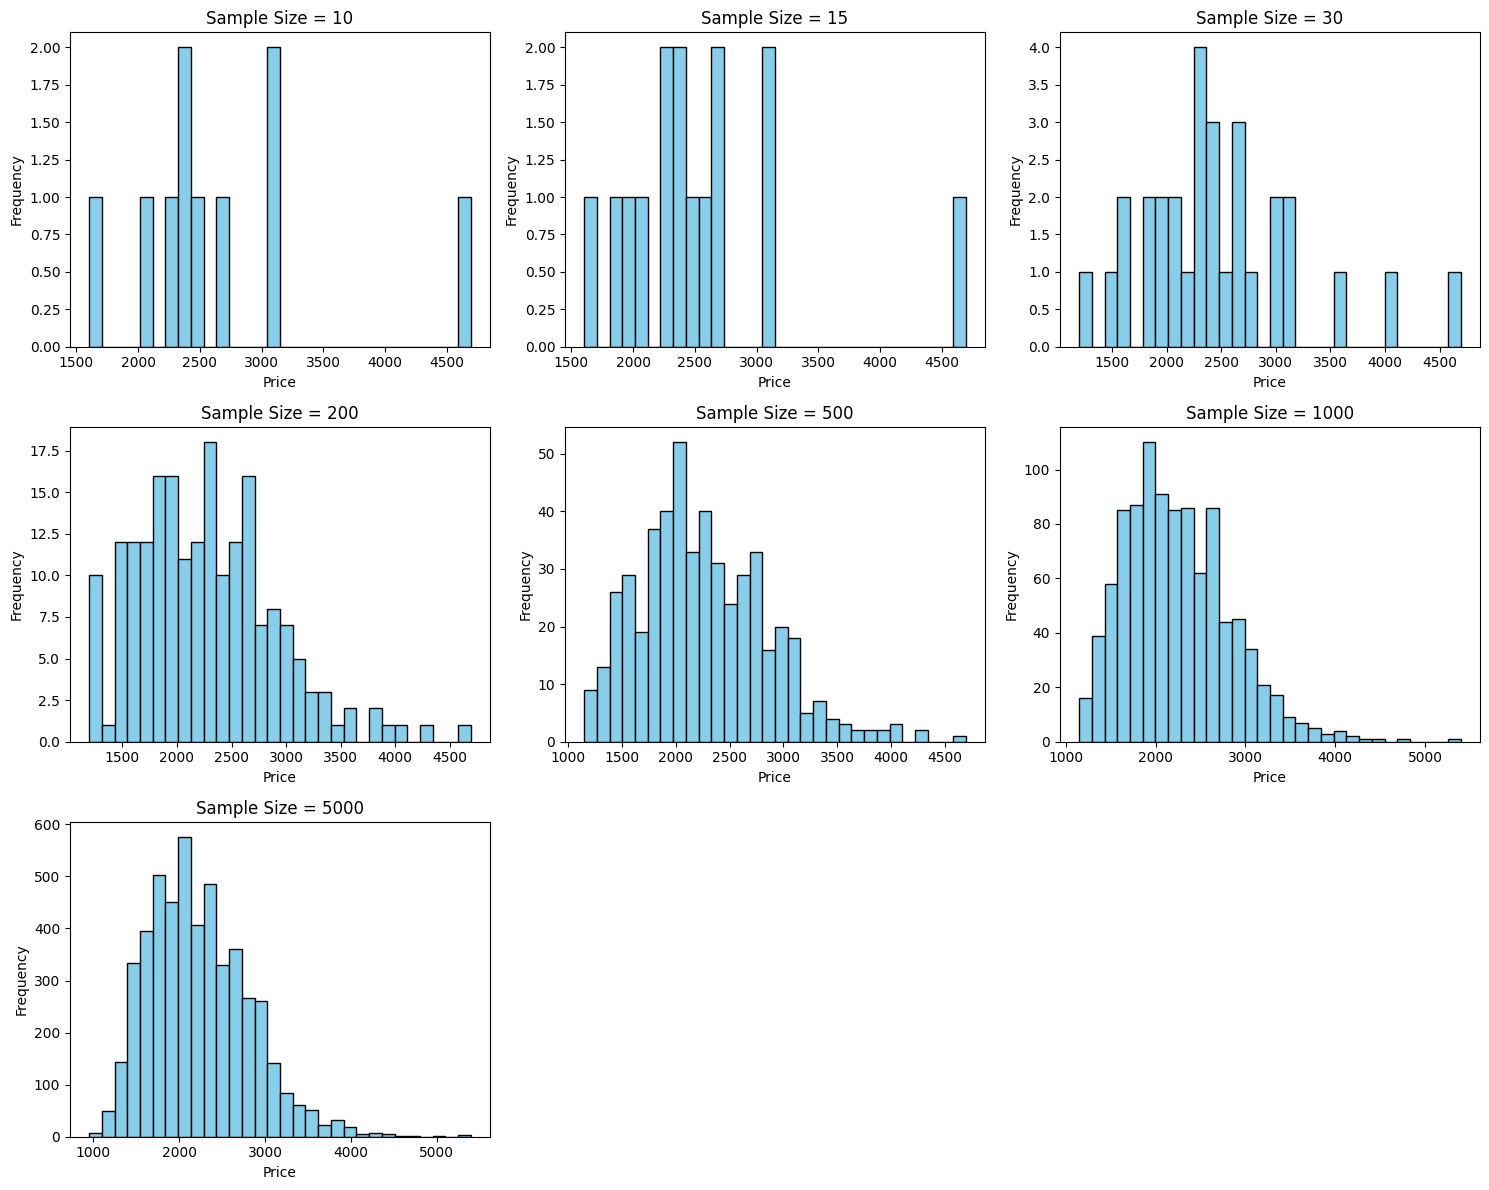

In [10]:
# COmputer Price Trends

size = [10, 15, 30, 200, 500, 1000, 5000]

# TASK - 3.1

for i in size:  
    df_sample = df.sample(n=i, replace=False, random_state=1) 
    Sam_mean = df_sample["price"].mean()
    print(f"Mean of Sample size ({i}) : {Sam_mean:.2f}")
    
    
# TASK * 3.2

plt.figure(figsize=(15, 12))  

for i, n in enumerate(size, 1):  
    df_sample = df.sample(n=n, replace=False, random_state=1)
    
    plt.subplot(3, 3, i)  
    plt.hist(df_sample['price'], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

### Central Limit Theorem Analysis

The Central Limit Theorem (CLT) states that when random samples of sufficiently large size are drawn from any population, the distribution of the sample means approaches a normal distribution, regardless of the shape of the original population. As the sample size increases, the sample mean gets closer to the population mean, and the variability of the sample means decreases.

In this analysis of computer prices:

1. **Sample Means Approach the Population Mean**  
   As the sample size increased from 10 to 5000, the sample means moved closer to the population mean (2219.58). This shows that larger samples provide more accurate estimates of the true mean.

2. **Variability Decreases with Larger Samples**  
   Smaller samples (n = 10, 15, 30) had high variation and inconsistent means, while larger samples (n ≥ 200) showed more stable and consistent averages, indicating reduced variability.

3. **Sampling Distribution Becomes Normal**  
   The histograms of larger samples (n ≥ 200) became smoother and bell-shaped, showing that the distribution of sample means tends toward normality as the sample size increases.

### ✅ Conclusion
The dataset satisfies all the properties of the Central Limit Theorem.  
As the sample size increased:
- The sample mean converged to the population mean.  
- The spread of data decreased.  
- The distribution of sample means became approximately normal.  

Thus, the CLT holds true for the computer price data, confirming that larger samples yield stable and normally distributed estimates of the population mean.
